In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [28]:
# File to Load 
ev_data = "Electric_Vehicle_Population_Data.csv"

## Electric Cars

In [39]:
# Read Student Data File and store into Pandas DataFrames
electric_df = pd.read_csv(ev_data)
electric_df.head()

,make,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
0,Toyota,Prius Prime,2018,OLYMPIA,WA,98502,168473210,25,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.97996899999998 47.078241),27300
1,Toyota,Prius Prime,2018,KENT,WA,98031,9585145,25,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.196448 47.40561),27300
2,Ford,Fusion Energi,2017,FEDERAL WAY,WA,98023,8877823,21,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.362029 47.308531),33120
3,Bmw,I3,2018,SEATTLE,WA,98136,474613408,114,Battery Electric Vehicle (BEV),POINT (-122.38895500000001 47.537382),44450
4,Ford,Focus,2013,KENT,WA,98032,252574269,76,Battery Electric Vehicle (BEV),POINT (-122.26132099999998 47.390601),39200


In [40]:
ev_car_df = electric_df.groupby(["make"]).count()
ev_car_df.head()

,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Audi,936,936,936,936,936,936,936,936,936,936
Azure Dynamics,9,9,9,9,9,9,9,9,9,9
Bmw,2569,2569,2569,2569,2569,2569,2569,2569,2568,2569
Cadillac,96,96,96,96,96,96,96,96,96,96
Chevrolet,7908,7908,7908,7908,7908,7908,7908,7908,7908,7908


In [31]:
ev_car_df.head()

,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Audi,936,936,936,936,936,936,936,936,936,936
Azure Dynamics,9,9,9,9,9,9,9,9,9,9
Bmw,2569,2569,2569,2569,2569,2569,2569,2569,2568,2569
Cadillac,96,96,96,96,96,96,96,96,96,96
Chevrolet,7908,7908,7908,7908,7908,7908,7908,7908,7908,7908


In [32]:
ev_make_count = electric_df["make"].value_counts()
ev_make_count 

Tesla                   23368
Nissan                  10947
Chevrolet                7908
Ford                     3610
Toyota                   2748
Bmw                      2569
Kia                      2172
Audi                      936
Volkswagen                928
Hyundai                   837
Chrysler                  743
Fiat                      720
Honda                     631
Volvo                     536
Mitsubishi                384
Porsche                   299
Smart                     241
Mercedes-Benz             230
Jaguar                    157
Mini                      149
Cadillac                   96
Subaru                     41
Land Rover                 25
Fisker                     17
Lincoln                    11
Azure Dynamics              9
Th!Nk                       4
Wheego Electric Cars        2
Dodge                       1
Name: make, dtype: int64

In [16]:
top_10_ev_car =ev_car_df.nlargest(10, 'model')
top_10_ev_car


,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Tesla,23368,23368,23368,23368,23368,23368,23368,23368,23367,23368
Nissan,10947,10947,10947,10947,10947,10947,10947,10947,10947,10947
Chevrolet,7908,7908,7908,7908,7908,7908,7908,7908,7908,7908
Ford,3610,3610,3610,3610,3610,3610,3610,3610,3610,3610
Toyota,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748
Bmw,2569,2569,2569,2569,2569,2569,2569,2569,2568,2569
Kia,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172
Audi,936,936,936,936,936,936,936,936,936,936
Volkswagen,928,928,928,928,928,928,928,928,928,928


In [38]:
top_10_ev_car_final = top_10_ev_car.groupby("make")["model"].sum()
top_10_ev_car_final 

make
Audi            936
Bmw            2569
Chevrolet      7908
Ford           3610
Hyundai         837
Kia            2172
Nissan        10947
Tesla         23368
Toyota         2748
Volkswagen      928
Name: model, dtype: int64

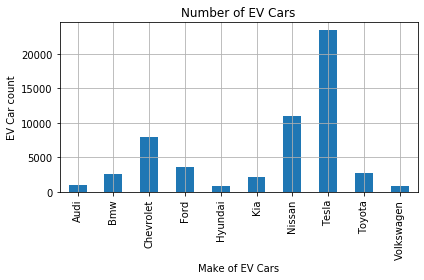

In [18]:
ev_car_chart = top_10_ev_car_final.plot(kind='bar')

# Set the xlabel and ylabel using class methods
ev_car_chart.set_xlabel("Make of EV Cars")
ev_car_chart.set_ylabel("EV Car count")
ev_car_chart.set_title("Number of EV Cars")
plt.tight_layout()
plt.grid()
plt.show()


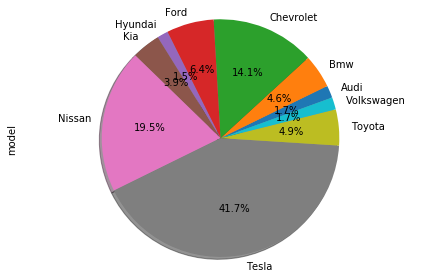

In [19]:
# Generate a pie plot showing the distribution of Ev Cars
top_10_ev_car_final.plot(kind ="pie",shadow=True, autopct = "%1.1f%%",startangle =20)
explode = (0.1,0)
plt.axis("equal")
plt.tight_layout()
plt.show()

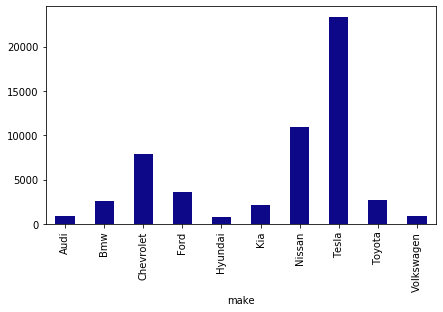

In [11]:
top_10_ev_car_final.plot(kind="bar",figsize=(7,4),colormap = "plasma")

## Electric Range

In [35]:
ev_range_df = electric_df[electric_df["Electric_Vehicle_Type"] == "Battery Electric Vehicle (BEV)"]
ev_range_df 

,make,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
3,Bmw,I3,2018,SEATTLE,WA,98136,474613408,114,Battery Electric Vehicle (BEV),POINT (-122.38895500000001 47.537382),44450
4,Ford,Focus,2013,KENT,WA,98032,252574269,76,Battery Electric Vehicle (BEV),POINT (-122.26132099999998 47.390601),39200
7,Kia,Niro,2020,VASHON,WA,98070,103345581,239,Battery Electric Vehicle (BEV),POINT (-122.469161 47.415443),0
8,Mercedes-Benz,B250E,2017,BELLEVUE,WA,98006,114828808,87,Battery Electric Vehicle (BEV),POINT (-122.151342 47.560192),40895
11,Tesla,Model 3,2019,WOODINVILLE,WA,98077,477708927,220,Battery Electric Vehicle (BEV),POINT (-122.05752200000002 47.749161),35000
...,...,...,...,...,...,...,...,...,...,...,...
60310,Tesla,Model 3,2018,SEATTLE,WA,98144,277151129,215,Battery Electric Vehicle (BEV),POINT (-122.30033 47.585339),36000
60311,Tesla,Model 3,2018,FRIDAY HARBOR,WA,98250,476247096,215,Battery Electric Vehicle (BEV),POINT (-123.084302 48.544106),36000
60314,Tesla,Model 3,2018,REDMOND,WA,98052,348309538,215,Battery Electric Vehicle (BEV),POINT (-122.122018 47.678465),36000
60315,Nissan,Leaf,2017,SEATTLE,WA,98115,327706032,107,Battery Electric Vehicle (BEV),POINT (-122.297534 47.685291),30680


In [37]:
ev_bat_df = ev_range_df ["make"["Electric_Vehicle_Type"].value_counts()
ev_bat_df 

Battery Electric Vehicle (BEV)    42456
Name: Electric_Vehicle_Type, dtype: int64

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# mouse_weight = weight_merge_df.iloc[:,0]
# average_tumor_volume =weight_merge_df.iloc[:,1]
plt.scatter(mouse_weight_avg_tumor,final_weight_avg_tumor)
plt.xticks(mouse_weight_avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()